In [1]:
# importing the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# loading the dataset
path = 'data\Customer Churn.csv'
churn_data = pd.read_csv(path)

churn_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [4]:
# renaming column
churn_data.columns = ['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_Sms',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'FN', 'FP', 'Churn']
churn_data.head()

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Age,Customer_Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [5]:
# removing some features from the dataset, by dropping the unimportant columns as it is not mentioned in the dataset information

churn_data.drop(['FN', 'FP', 'Age'], axis=1, inplace=True)
churn_data

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Customer_Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,1077.640,0


                                                          MODELLING

*The problem we are trying to solve is a Classification Problem. we are trying to take each customer and classify them into either the Non-Churn Class (denoted as a 0) or the Churn Class (denoted as a 1).*

*The target (Dependent variable) is the Churn Variable.*

*The 3 different ML Algorithm that will be use are; the Logistic regression, the Decision Tree Algorithm and the Naive bayes Algorithm.*

In [54]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [13]:
#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
#Spliting data into train and test sets
from sklearn.model_selection import train_test_split
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [15]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

### Logistic regression Algorithm

*Logistic regression is a statistical model that uses a logistic function to model a binary
dependent variable. Mathematically, a binary logistic model has a dependent variable with two possible values,
in this case, it is Churn/none-Churn which is represented by an indicator variable, where the two values are labeled "0" and "1".*

In [16]:
# Logistic Regression Model Algorithm
logR_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.8587301587301587
precision:  0.4791666666666667
recall:  0.26436781609195403
f1_score:  0.8407731922398589


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                                                                Inference

*Accuracy of 0.86 indicates that 86% of the customers were correctly classified.*

*Precision of 0.47 indicates that 47% of the churned customers predicted by the model have actually churned.*

*Recall score of 0.26 indicates that the model was able to predict 26% of the actual churned customers as
churned.*

*F1 score of 0.84 out of maximum of 1 indicates that the model performs really well.*

#### Decision Tree Algorithm

*The decision tree algorithm can be used for solving regression and classification problems. The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from the training data.*

In [17]:
# Decision Tree Classifier Algorithm
decT_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.9444444444444444
precision:  0.7888888888888889
recall:  0.8160919540229885
f1_score:  0.944838307484441


                                                     Inference

*Accuracy of 0.94 indicates that 94% of the customers were correctly classified.*

*Precision of 0.79 indicates that 79% of the churned customers predicted by the model have actually churned.*

*Recall score of 0.82 indicates that the model was able to predict 82% of the actual churned customers as
churned.*

*F1 score of 0.94 out of maximum of 1 indicates that the model performs really well.*

### Naive Bayes Classifier Algorithm

*The Naive Bayes classification algorithm is a probabilistic classifier. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.*

In [18]:
# Naive Bayes Algorithm 
naB_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.7238095238095238
precision:  0.33073929961089493
recall:  0.9770114942528736
f1_score:  0.7664252346617535


                                                             Inference

*Accuracy of 0.72 indicates that 65% of the customers were correctly classified.*

*Precision of 0.33 indicates that 33% of the churned customers predicted by the model have actually churned.*

*Recall score of 0.97 indicates that the model was able to predict 97% of the actual churned customers as
churned.*

*F1 score of 0.76 out of maximum of 1 indicates that the model performs really well.*

The Appropriate Metrics used shows:

*Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model.*


*Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all customers labeled as churn, how many actually churned? High precision relates to the low false positive rate.* 

*Recall - Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The question recall answers is: Of all the customers that truly churned, how many did we label? for recall values to be considered good, the values should be above 0.5. The performance metrics with a good recall value is the Decision Tree Classifier Algorithm.*

*F1 score - The F1 Score is the harmonic mean of Precision and Recall. It helps give us a balanced idea of how the model is performing on the Churn class. In this case a Churn Class F1 Score of 0.8 to 0.95 is pretty good. There is usually a trade off between Precision and Recall. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.*

*From the three selected performance metrics, the Decision Tree Classifier Algorithm has the highest scores across all chosen metrics*

                                                FEATURE SELECTION

Feature is more commonly used term in machine learning, whereas independent variable is more common in statistics. Feature and independent variable are different terms used for the same thing. A feature is a measurable property of the object you’re trying to analyze. In datasets, features appear as columns.The quality of the features in your dataset has a major impact on the quality of the insights you will gain when you use that dataset for machine learning.

The reason why Feature selection method is used, is because, Machine learning models basically follow a simple rule: whatever goes in as input comes back. What this means is that, If we put garbage into our model, we can expect the output to be garbage too. Garbage here refers to noisy data.

Before a model is trainned, we collect various quantities of data that helps the machine learn better. Usually, a good portion of the data collected is noise, while some of the columns of our dataset might not contribute significantly to the performance of our model. Basically, having so much data can slow down the training process and cause the model to be a bit slower. The model may also learn from this irrelevant data and be inaccurate.

Feature selection method is reducing the number of variables (input variables) in the process of developing a predictive model. Reducing the number of input variables helps reduces the computational cost of modeling and also helps to improve the performance of the model.


<AxesSubplot:>

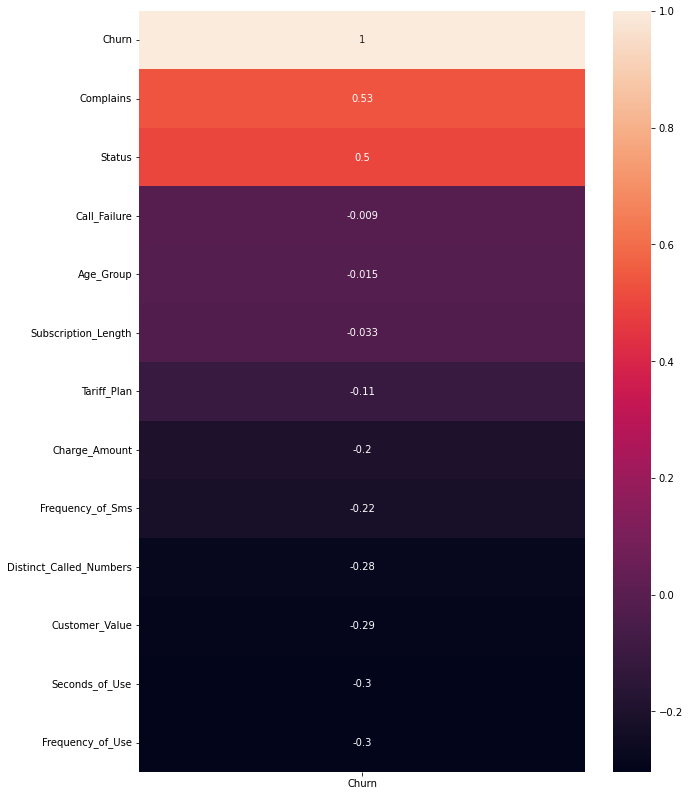

In [19]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
churn_data_corr = churn_data.corr()[['Churn']].sort_values(
  by='Churn', ascending=False)
sns.heatmap(churn_data_corr, annot=True, ax=ax)

In [20]:
# creating  correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = churn_data.corr()

In [21]:
# looping through all the columns in the correlation matrix.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # adding the columns with a correlation value of 0.7 to the
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [22]:
# printing the names of the correlated features
print(correlated_features)

{'Frequency_of_Use', 'Customer_Value', 'Distinct_Called_Numbers'}


In [23]:
# dropping correlated features
churn_data.drop(labels=correlated_features, axis=1, inplace=True)
churn_data

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Sms,Age_Group,Tariff_Plan,Status,Churn
0,8,0,38,0,4370,5,3,1,1,0
1,0,0,39,0,318,7,2,1,2,0
2,10,0,37,0,2453,359,3,1,1,0
3,10,0,38,0,4198,1,1,1,1,0
4,3,0,38,0,2393,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,92,2,2,1,0
3146,17,0,17,1,9237,80,5,1,1,0
3147,13,0,18,4,3157,38,3,1,1,0
3148,7,0,11,2,4695,222,3,1,1,0


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Call_Failure'>

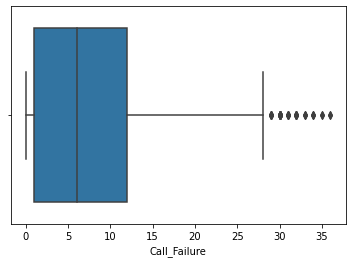

In [27]:
sns.boxplot(churn_data['Call_Failure'])

*In the above graph, it is clearly shown that values above 35 are acting as the outliers.*

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Subscription_Length'>

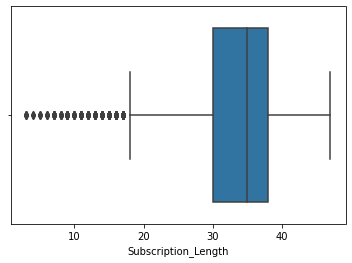

In [25]:
# outliners 
sns.boxplot(churn_data['Subscription_Length'])

*In the above graph, it is clearly shown that values below 20 are acting as the outliers.*

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Charge_Amount'>

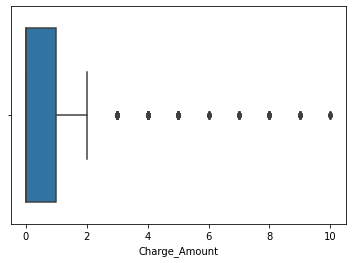

In [29]:
# outliners 
sns.boxplot(churn_data['Charge_Amount'])

*In the above graph, it is clearly shown that values above 2 are acting as the outliers.*

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seconds_of_Use'>

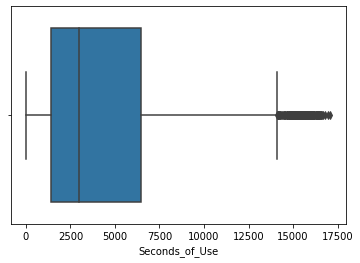

In [30]:
# outliners 
sns.boxplot(churn_data['Seconds_of_Use'])

*In the above graph, it is clearly shown that values above 15000 are acting as the outliers.*

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency_of_Sms'>

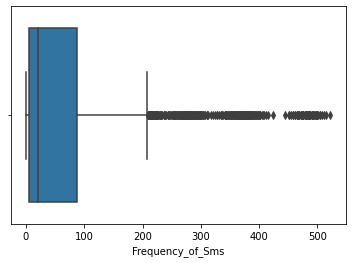

In [31]:
# outliners 
sns.boxplot(churn_data['Frequency_of_Sms'])

*In the above graph, it is clearly shown that values above 200 are acting as the outliers.*

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_Group'>

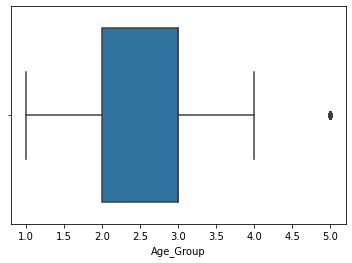

In [39]:
# outliners 
sns.boxplot(churn_data['Age_Group'])

*In the above graph, it is clearly shown that values above 5.0 are acting as the outliers.*